In [1]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

In [2]:
import pandas as pd
pd.set_option('max_columns', 50)
pd.set_option('max_colwidth',400)

In [10]:
from lac.plot import plot_with_roads
from lac.get import crimes, repairs, roads, streetlights, workorders, service_requests

In [6]:
workorders.info().compute()

[####################                    ] | 50% Completed |  6.3s<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 303189 entries, 0 to 303188
Data columns (total 59 columns):
OBJECTID                  303189 non-null int64
WORKORDERID               303189 non-null object
PROJECTID                 194213 non-null float64
DESCRIPTION               303189 non-null object
STATUS                    303171 non-null object
INITIATEDDATE             303189 non-null object
WORKORDERCLOSEDDATE       261875 non-null object
ACTUALSTARTDATE           102586 non-null object
ACTUALFINISHDATE          224946 non-null object
PROJECTNAME               161060 non-null object
PRIORITY                  280128 non-null object
SOURCEWORKORDERID         7125 non-null object
CYCLETYPE                 303189 non-null object
SCHEDULEDATE              0 non-null object
WORKORDERCATEGORY         260418 non-null object
UNATTACHED                303189 non-null object
WORKORDERCOST             303187 non-n

In [11]:
workorders.DESCRIPTION.value_counts()

PLANTING                                     55606
PRUNING                                      53670
POTHOLE STREET REPAIR                        39638
MAINTENANCE REPAIR                           28276
TREE REMOVAL                                 19052
EMERGENCY                                    18460
SIDEWALK REMOVE & REPLACE                     9006
METER INSPECT                                 8781
PRUNING (ELM)                                 6207
LIGHT MALFUNCTION                             5693
WARRANTY                                      5575
STUMP REMOVAL                                 3707
ELM INJECTION                                 3460
PARKING SIGN REPLACEMENT                      3399
STREET GENERAL REPAIR                         3186
ALLEY REPAIR                                  3014
SIDEWALK REMOVE                               2458
STREET NAME SIGN REPLACEMENT                  1847
POLE PAINTING                                 1784
STORM (DEBRIS PILE)            

In [10]:
workorders[workorders.DESCRIPTION.str.contains('light', case=False)].DESCRIPTION.value_counts()

LIGHT MALFUNCTION                                   5693
LIGHTING SURVEY                                      482
LIGHT POLE LIGHT OUT                                   9
LIGHT POLE DAY BURNER                                  3
LIGHT POLE ELEPHANT EARS                               2
LIGHT-INFRASTRUCTURE MANHOLE/HANDHOLD INSPECTION       2
LIGHT POLE KNOCK-DOWNS/WIRESDOWN                       1
LIGHT-INFRASTRUCTURE WTW SIGN LIGHT OUT                1
LIGHT-LIGHT POLE MISSING POLE                          1
LIGHT-LEANING POLE                                     1
LIGHT-INFRASTRUCTURE NAVIGATION LIGHTS                 1
LIGHT-INFRASTRUCTURE MISS UTILITY REQUEST              1
LIGHT POLE BRIDGE LIGHTING NO CURRENT                  1
LIGHT-INFRASTRUCTURE BRIDGE CONTROL                    1
LIGHT-INVESTIGATION                                    1
LIGHT-INFRASTRUCTURE INSTALL                           1
LIGHT-INFRASTRUCTURE MANHOLE CLEANING                  1
LIGHT POLE DIM LIGHT           

## Crimes

In [4]:
crimes = crimes.compute()
crimes.info()
crimes.head()

[########################################] | 100% Completed |  3.4s
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 285689 entries, 0 to 31582
Data columns (total 23 columns):
CCN                     285689 non-null object
REPORT_DAT              285689 non-null datetime64[ns]
SHIFT                   285689 non-null category
METHOD                  285689 non-null object
OFFENSE                 285689 non-null category
BLOCK                   285689 non-null object
XBLOCK                  285689 non-null float64
YBLOCK                  285689 non-null float64
WARD                    285677 non-null object
ANC                     285689 non-null object
DISTRICT                285522 non-null object
PSA                     285504 non-null object
NEIGHBORHOOD_CLUSTER    282041 non-null object
BLOCK_GROUP             284828 non-null object
CENSUS_TRACT            284828 non-null object
VOTING_PRECINCT         285622 non-null object
LATITUDE                285689 non-null float64


CCN          REPORT_DAT     SHIFT  METHOD                     OFFENSE  \
0  17046092 2018-01-29 00:00:00  MIDNIGHT  OTHERS                    HOMICIDE   
1  18000025 2018-01-01 01:26:04  MIDNIGHT  OTHERS                 THEFT/OTHER   
2  18000063 2018-01-01 02:59:43  MIDNIGHT  OTHERS                    BURGLARY   
3  18000080 2018-01-01 02:45:00  MIDNIGHT  OTHERS                     ROBBERY   
4  18000158 2018-01-01 04:47:20  MIDNIGHT  OTHERS  ASSAULT W/DANGEROUS WEAPON   

                                 BLOCK    XBLOCK    YBLOCK WARD ANC DISTRICT  \
0     5400 - 5599 BLOCK OF C STREET SE  406737.0  135154.0    7  7E        6   
1  1500 - 1599 BLOCK OF 22ND STREET NW  395767.0  138059.0    2  2D        2   
2  3400 3499  BLOCK OF WHEELER ROAD SE  400554.0  130271.0    8  8C        7   
3  1900 - 1920 BLOCK OF 14TH STREET NW  397228.0  138674.0    2  2B        3   
4       600 - 699 BLOCK OF H STREET NW  398185.0  136884.0    2  2C        1   

   PSA NEIGHBORHOOD_CLUSTER BLOCK_GROUP CENSUS_TRACT VOTING_PRECINCT  \
0  604           Cluster 33    009905 2       009905    Precinct 105   
1  208            Cluster 6    004100 3       004100     Precinct 14   
2  705           Cluster 39    009804 1       009804    Precinct 122   
3  301            Cluster 3    004300 2       004300    Precinct 141   
4  102            Cluster 8    005800 2       005800    Precinct 129   

    LATITUDE  LONGITUDE       BID          START_DATE            END_DATE  \
0  38.884198 -76.922352      None 2017-03-21 15:00:37 2017-03-21 21:36:09   
1  38.910383 -77.048806      None 2017-12-31 20:00:08 2017-12-31 23:55:47   
2  38.840235 -76.993619      None 2017-12-31 21:20:35 2017-12-31 23:36:11   
3  38.915929 -77.031963      None 2018-01-01 01:49:14 2018-01-01 02:45:00   
4  38.899806 -77.020924  DOWNTOWN 2018-01-01 02:26:26 2018-01-01 02:27:31   

    OBJECTID                                     geometry  
0  122552223  POINT (406736.8033200115 135154.8642473567)  
1  122567393  POINT (395766.8010350095 138059.8645884403)  
2  122567394  POINT (400553.8021793573 130271.8631148086)  
3  122567395  POINT (397227.8013164966 138674.8647463207)  
4  122567397  POINT (398184.8015505272 136884.8644045677)

[########################################] | 100% Completed | 28.0s


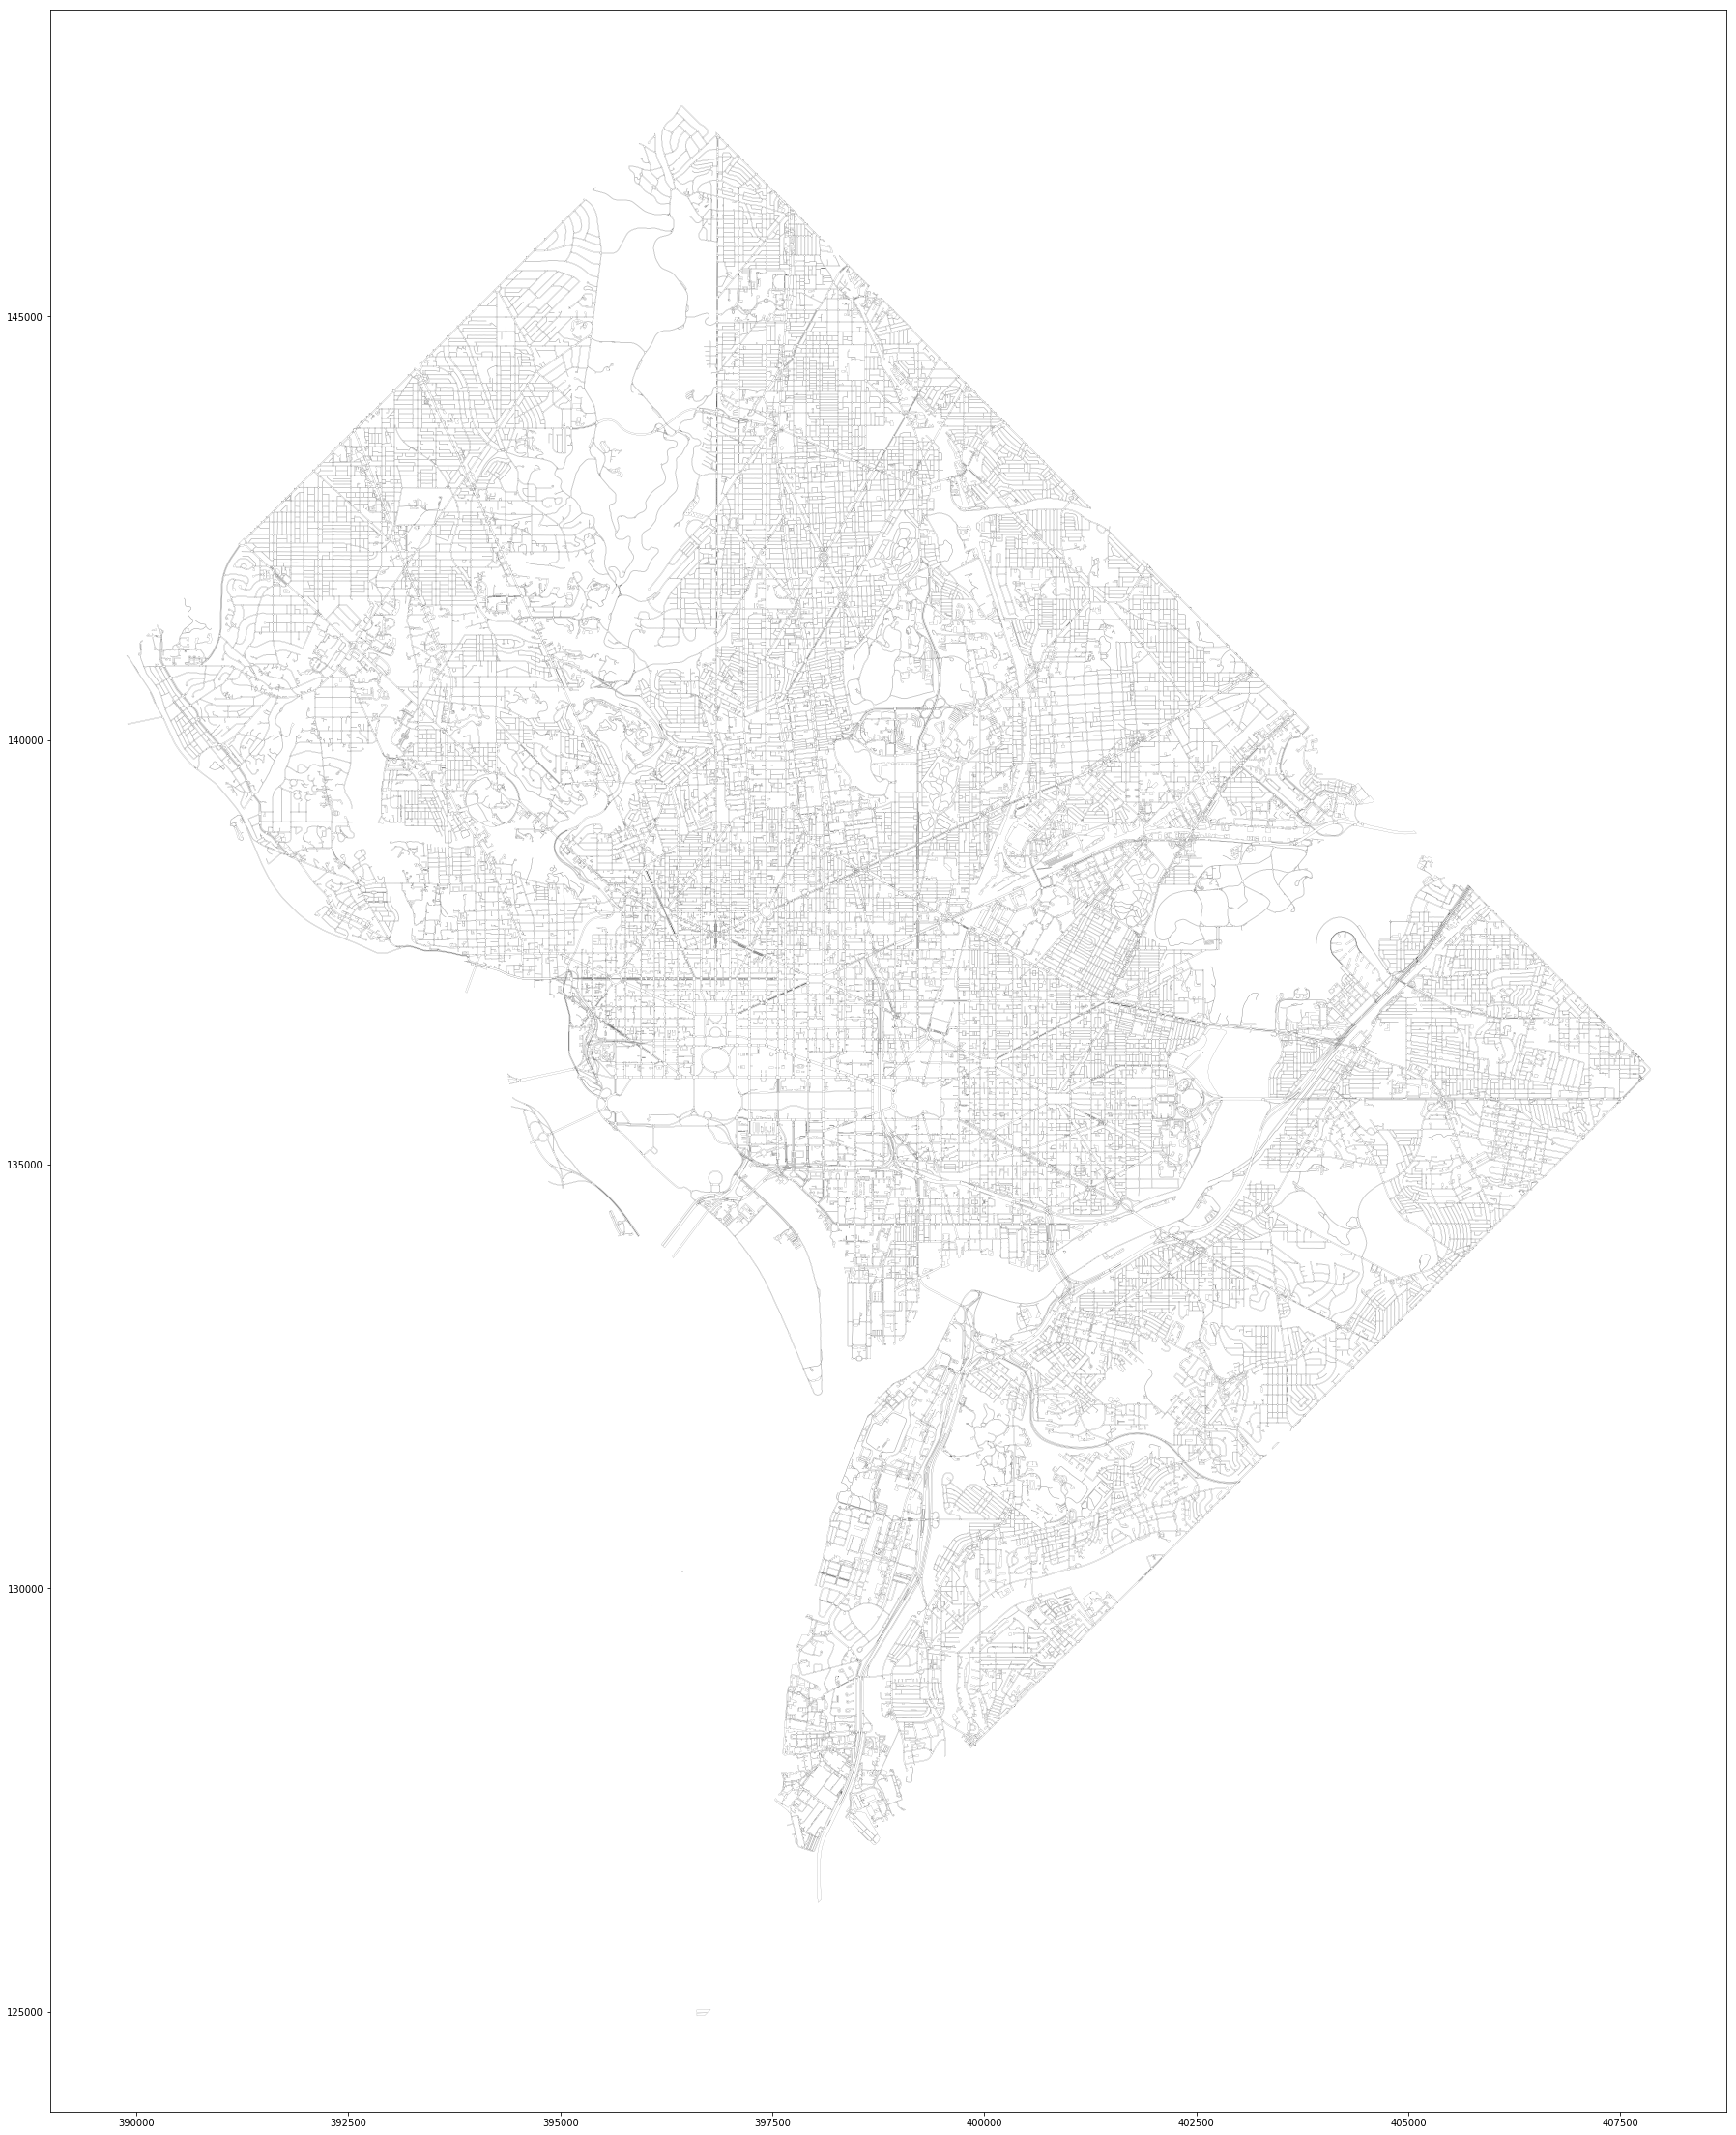

In [5]:
plot_with_roads(crimes, markersize=2, alpha=0.1).compute()

## Repairs

In [11]:
repairs = repairs.compute()

[########################################] | 100% Completed |  6.7s


In [12]:
repairs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5930 entries, 13372 to 302394
Data columns (total 59 columns):
OBJECTID                  5930 non-null int64
WORKORDERID               5930 non-null object
PROJECTID                 10 non-null float64
DESCRIPTION               5930 non-null object
STATUS                    5930 non-null object
INITIATEDDATE             5930 non-null datetime64[ns]
WORKORDERCLOSEDDATE       5930 non-null datetime64[ns]
ACTUALSTARTDATE           4699 non-null object
ACTUALFINISHDATE          5930 non-null object
PROJECTNAME               3 non-null object
PRIORITY                  5842 non-null object
SOURCEWORKORDERID         30 non-null object
CYCLETYPE                 5930 non-null object
SCHEDULEDATE              0 non-null object
WORKORDERCATEGORY         8 non-null object
UNATTACHED                5930 non-null object
WORKORDERCOST             5930 non-null float64
WORKORDERLABORCOST        5930 non-null float64
WORKORDERMATERIALCOST     59

In [15]:
repairs[['INITIATEDDATE', 'WORKORDERCLOSEDDATE']].describe()

INITIATEDDATE  WORKORDERCLOSEDDATE
count                  5930                 5930
unique                 5919                 5860
top     2016-12-14 03:31:21  2017-04-24 18:03:19
freq                      3                    8
first   2014-02-24 10:15:04  2014-02-25 08:37:02
last    2018-02-06 12:43:43  2018-02-08 11:08:05

## Streetlights

In [5]:
streetlights_df = streetlights.compute()

[########################################] | 100% Completed | 39.5s


In [6]:
streetlights_df.info()
streetlights_df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 70213 entries, 0 to 70212
Data columns (total 96 columns):
OBJECTID                   70213 non-null int64
FACILITYID                 70212 non-null object
PEPCOLIGHTID               29375 non-null object
ASSETTYPE                  70213 non-null int64
ISMETERED                  70207 non-null float64
LIGHTTYPE                  70170 non-null float64
POLETYPE                   70004 non-null object
POLEHEIGHT                 69806 non-null object
POWERFEED                  70195 non-null float64
NUMBERARMS                 66309 non-null float64
PROXIMITY                  70061 non-null float64
STREETNAME                 70213 non-null object
QUADRANT                   70213 non-null int64
CROSSSTREET                70142 non-null object
ROADTYPE                   70213 non-null int64
OWNER                      70213 non-null int64
WARD                       70213 non-null int64
COMMENTS                   2584 non-null object
HOU

OBJECTID FACILITYID PEPCOLIGHTID  ASSETTYPE  ISMETERED  LIGHTTYPE  \
0   1410957      6L993         None          1        0.0        6.0   
1   1410958    74470DC  811386-7794          2        0.0        1.0   
2   1410959    73076DC  000000-0000          1        0.0        1.0   
3   1410960    72749DC  823387-5166          1        0.0        1.0   
4   1410961      25877         None          2        0.0        1.0   

    POLETYPE POLEHEIGHT  POWERFEED  NUMBERARMS  PROXIMITY  STREETNAME  \
0         PP         28        1.0         1.0        4.0     11TH ST   
1  Wood Pole         35        2.0         1.0        2.0  BENNING RD   
2  Wood Pole         35        2.0         1.0        4.0     CLAY ST   
3  Wood Pole         35        2.0         1.0        1.0     56TH ST   
4         5A         28        1.0         1.0       10.0        O ST   

   QUADRANT                 CROSSSTREET  ROADTYPE  OWNER  WARD  \
0         3                        M ST         1      1     6   
1         2                     34TH ST         4     11     7   
2         2                     55TH ST         1     11     7   
3         2  NANNIE HELEN BURROUGHS AVE         1     11     7   
4         1                      9TH ST         4      1     2   

               COMMENTS HOUSENO  RMS  STREETSEGMID OTHEREQUIPMENT  CONDITION  \
0                  None    1100  0.0          5422           None        4.0   
1                  None    3375  0.0          8947           None        NaN   
2                  None    5400  0.0          5986           None        NaN   
3  Update location only     616  0.0          3482           None        NaN   
4                  None     910  0.0          1678           None        NaN   

  CREATED_USER CREATED_DATE                     ...                       \
0         None         None                     ...                        
1         None         None                     ...                        
2         None         None                     ...                        
3         None         None                     ...                        
4         None         None                     ...                        

  TRAFFICCOMBO_DESC OTHEREQUIPMENT_DESC LIGHTMANUFACTURER  \
0              None                None    King Luminaire   
1              None                None  General Electric   
2              None                None  General Electric   
3              None                None  General Electric   
4              None                None  General Electric   

  LIGHTMANUFACTURER_DESC      TBASETYPE TBASETYPE_DESC POLECOLOR_DESC  \
0         King Luminaire  Non-Breakaway  Non-Breakaway          Black   
1       General Electric             DB             DB           None   
2       General Electric             DB             DB           None   
3       General Electric             DB             DB           None   
4       General Electric             DB             DB           None   

  CCT_DESC INSPECTIONGROUP ASSETSTATUS ASSETSTATUS_DESC WHYINACTIVE  WATTAGE2  \
0     4000            None      Active           Active        None      None   
1     None            None      Active           Active        None      None   
2     None            None      Active           Active        None      None   
3     None            None      Active           Active        None      None   
4     None            None      Active           Active        None      None   

   WATTAGE2_DESC FEEDMANHOLE FEEDMANHOLE_DESC         ARMSTYLE  \
0           None        None             None  Simple Teardrop   
1           None        None             None    Regular Alley   
2           None        None             None             None   
3           None        None             None             None   
4           None        None             None    Regular Alley   

     ARMSTYLE_DESC ARMLENGTH2 ARMLENGTH2_DESC ROADCLASSIFICATION  \
0  Simple Teardrop        NaN         

In [ ]:
repairs.join(streetlights_df, how='left', left_on)

[########################################] | 100% Completed | 27.9s


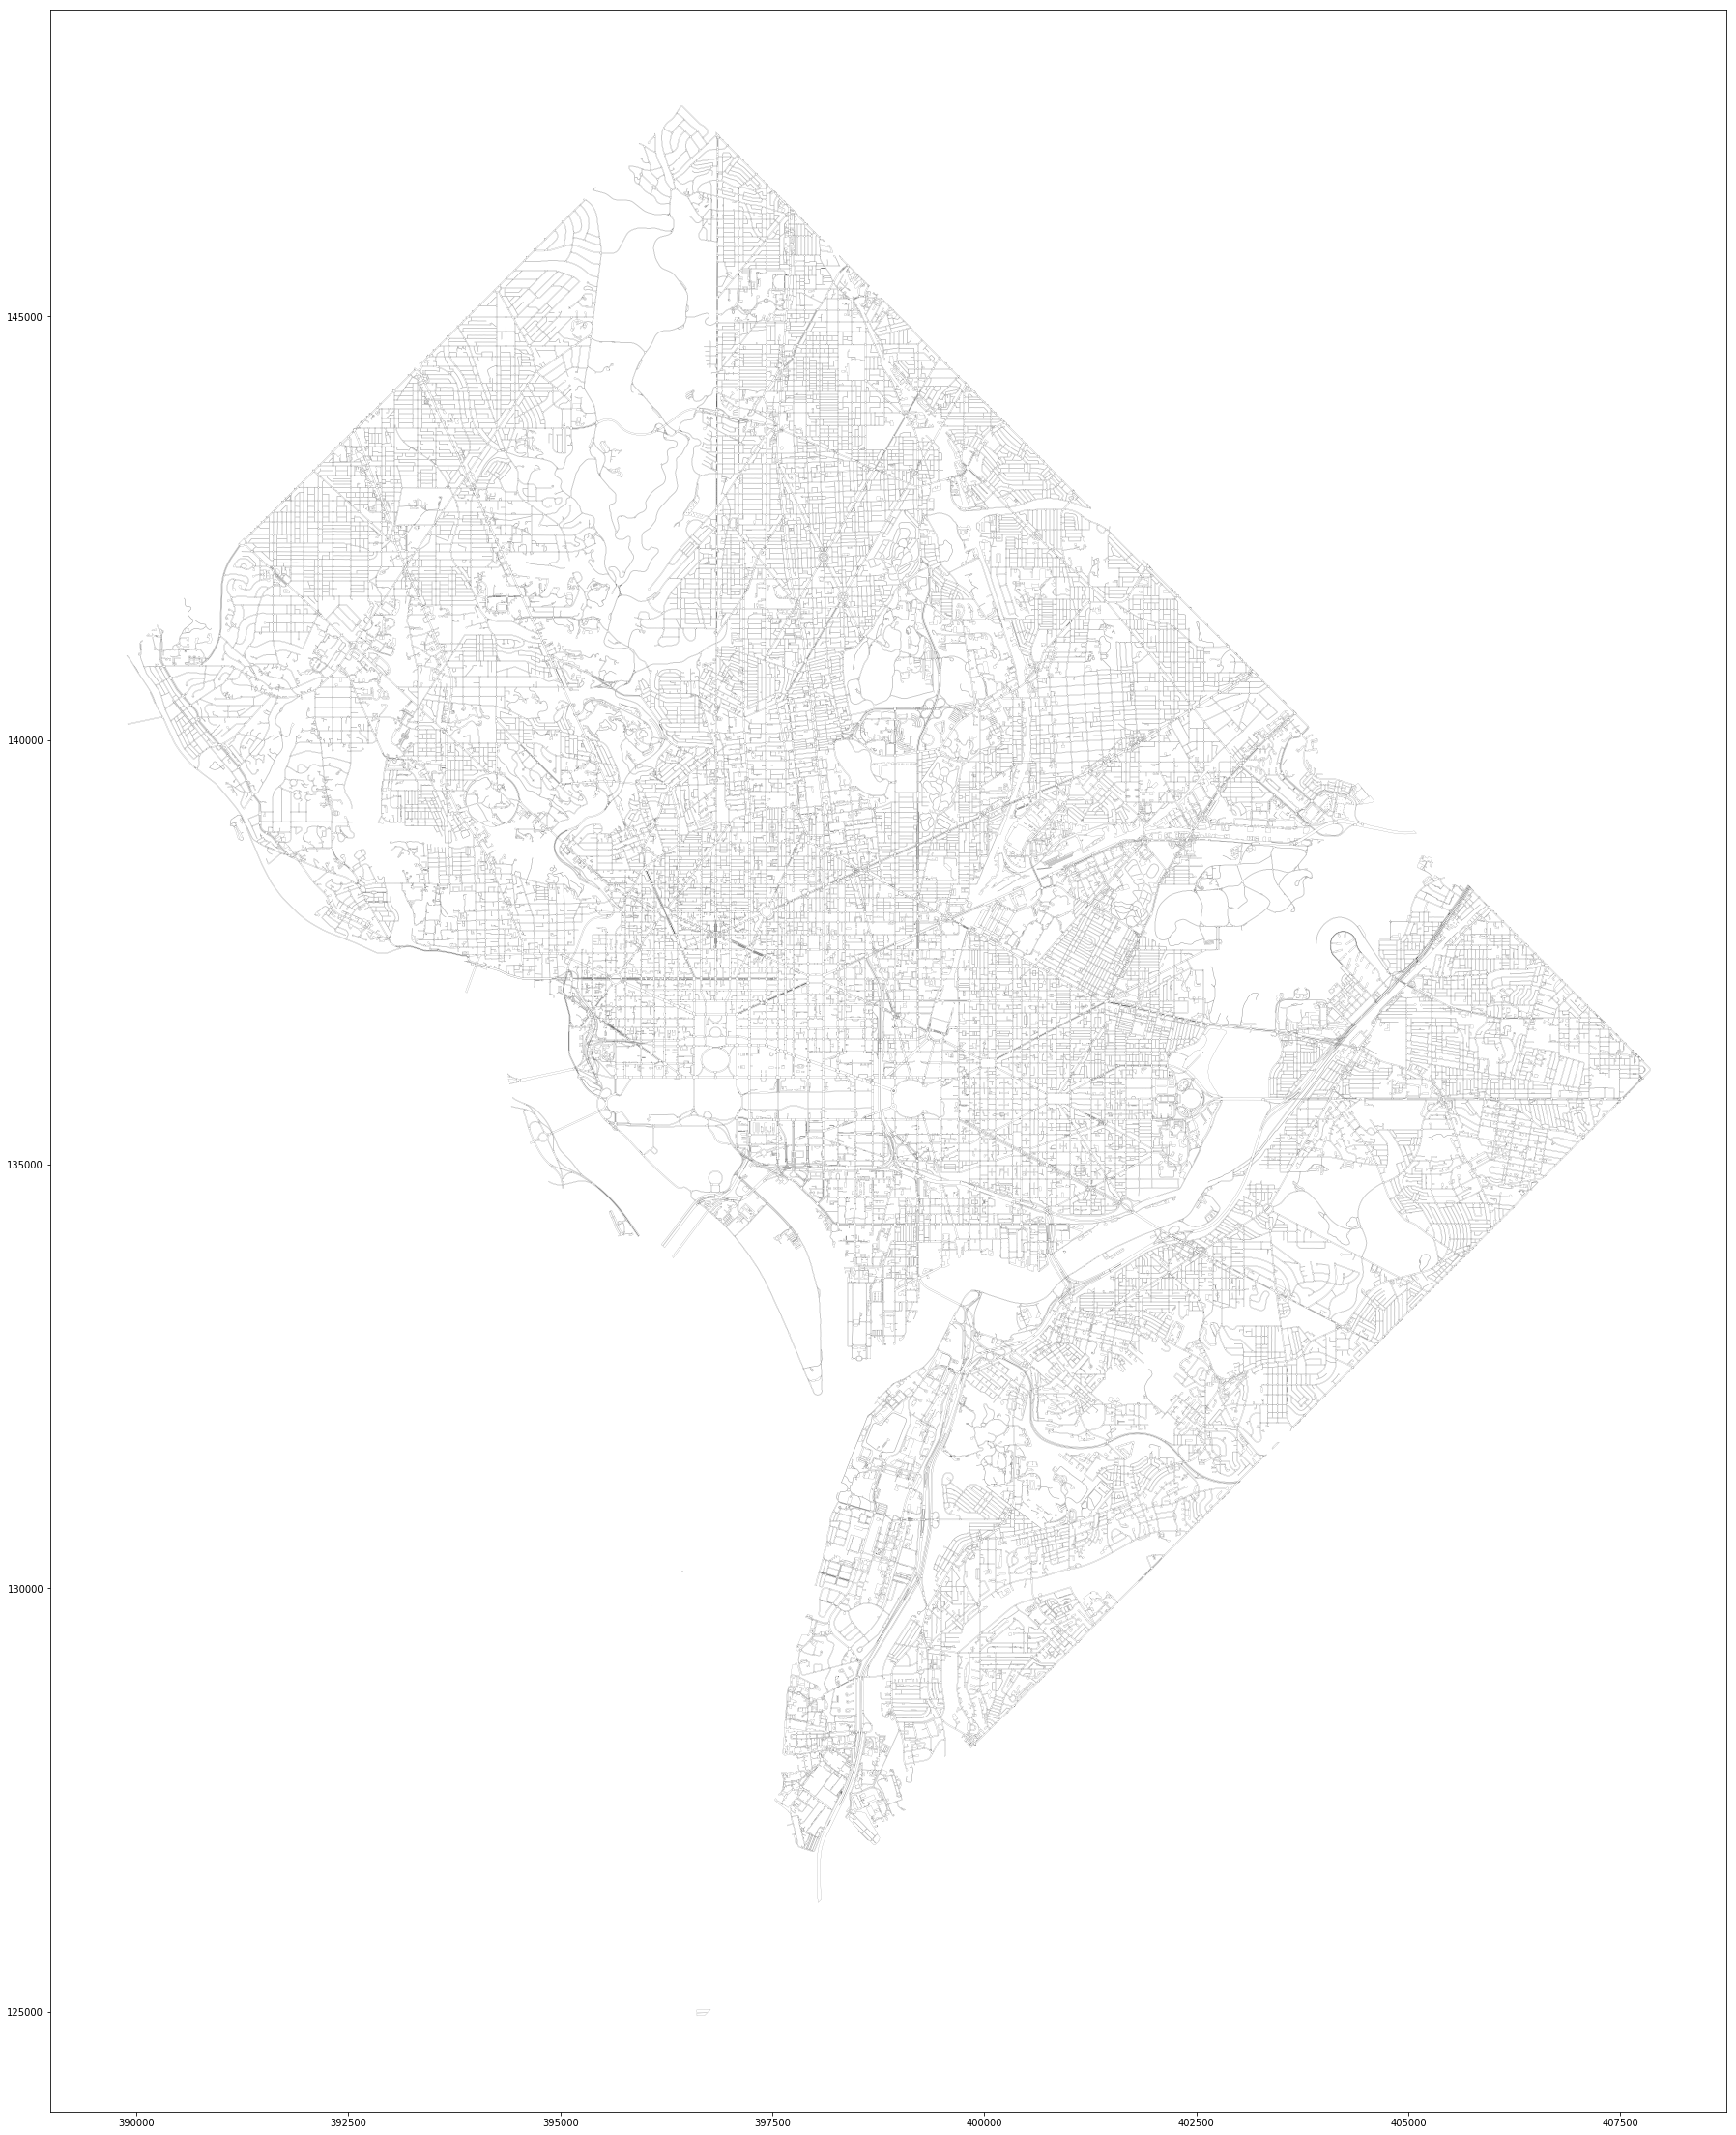

In [14]:
plot_with_roads(repairs, markersize=2, alpha=0.5).compute()